In [2]:
library(tidyverse)
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()


# STATS 306
## Homework 1: Plotting and data manipulation

- Each problem is worth one or two points for a total of 10. 
- For each problem, enter the R code in the cell provided marked "YOUR SOLUTION HERE".

## Problem 1: Recap of Lecture 1 (2 pts)

**(a)** Write the command to install the package `tidyverse`. For this problem, you can comment out the command using # so that you do not need to reinstall your `tidyverse` package. Then, load the `tidyverse` package into your current environment.  _1/2 point_

In [ ]:
# Your solution here

**(b)** Write the command to get more information on the `airquality` data set. What is the `airquality` dataset about? Output the `airquality` first 6 rows of the data set. _1 point_

In [ ]:
# Your solution here

**(c)** How many rows and columns does `airquality` have?  __1/2 point__

In [ ]:
# Your solution here

**(d)** To create a scatterplot using `Wind` and `Temp` variables in the `airquality` data
frame, Professor Terhorst uses the following command

```
ggplot() +
    geom_point(mapping = (x = Wind, y = Temp))
```

and R produces an error. 

Fix Professor Terhorst's code and type it below to produce a scatterplot. Output your results.  _1 point_

In [ ]:
# Your solution here

## Problem 2: Animals (3 pts)
Problems 2 is based on the `animals` table, which is defined for you in the next cell.

In [3]:
library(MASS)
animals <- as_tibble(MASS::Animals) %>% mutate(species = rownames(MASS::Animals))

**(a)** How are brain mass and body mass related? Following the examples we saw in Lecture 1, reproduce the following plot: _2 points_
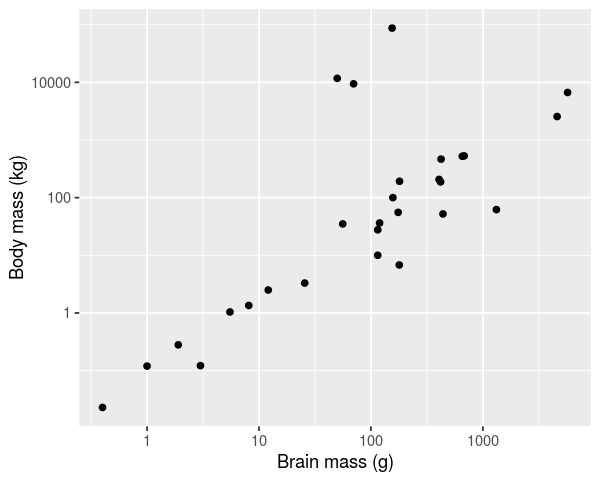

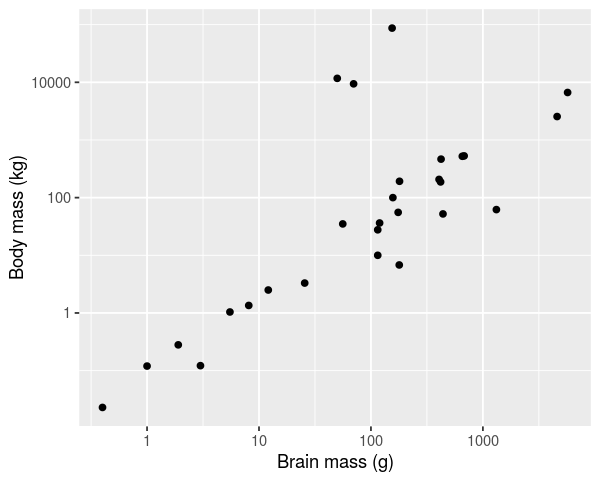

In [18]:
### BEGIN SOLUTION
ggplot(animals,
       aes(x = brain, y = body
          )) + 
    geom_point() +
    scale_x_log10() + scale_y_log10() +
    xlab("Brain mass (g)") + ylab("Body mass (kg)")
### END SOLUTION

**(b)**
The preceding plot indicates that the log of brain mass is linearly related to the log of body mass. Check this by computing the correlation of brain mass with body mass, and compare that with the correlation between the logs of those two quantities. (*Hint*: R contains a built-in function for computing the correlation of two vectors.) _1 point_

In [4]:
### BEGIN SOLUTION
cor(animals$brain, animals$body)
cor(log(animals$brain), log(animals$body))
### END SOLUTION

[1] -0.005341163

[1] 0.7794935

## Problem 3: Flights (3 pts)
This problem looks more at the `flights` dataset that we saw in lecture.

**(a)** The following command lists the top five air carriers in this dataset:

In [5]:
flights_top5 <- count(flights, carrier) %>% top_n(5) %>% print

Selecting by n


# A tibble: 5 × 2
  carrier     n
  <chr>   <int>
1 AA      32729
2 B6      54635
3 DL      48110
4 EV      54173
5 UA      58665


Use `filter()` to subset the flights table down to only those top five carriers. You should end up with a table that has 248,312 rows, the first ten of which look like:  _1 point_

    # A tibble: 248,312 x 19
        year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
       <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
     1  2013     1     1      517            515         2      830            819
     2  2013     1     1      533            529         4      850            830
     3  2013     1     1      542            540         2      923            850
     4  2013     1     1      544            545        -1     1004           1022
     5  2013     1     1      554            600        -6      812            837
     6  2013     1     1      554            558        -4      740            728
     7  2013     1     1      555            600        -5      913            854
     8  2013     1     1      557            600        -3      709            723
     9  2013     1     1      557            600        -3      838            846
    10  2013     1     1      558            600        -2      753            745
    # ... with 248,302 more rows, and 11 more variables: arr_delay <dbl>,
    #   carrier <chr>, flight <int>, tailnum <chr>, origin <chr>, dest <chr>,
    #   air_time <dbl>, distance <dbl>, hour <dbl>, minute <dbl>, time_hour <dttm>

In [7]:
### BEGIN SOLUTION
print(filter(flights, carrier %in% flights_top5$carrier))
### END SOLUTION

# A tibble: 248,312 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1      517        515       2     830     819      11 UA     
 2  2013     1     1      533        529       4     850     830      20 UA     
 3  2013     1     1      542        540       2     923     850      33 AA     
 4  2013     1     1      544        545      -1    1004    1022     -18 B6     
 5  2013     1     1      554        600      -6     812     837     -25 DL     
 6  2013     1     1      554        558      -4     740     728      12 UA     
 7  2013     1     1      555        600      -5     913     854      19 B6     
 8  2013     1     1      557        600      -3     709     723     -14 EV     
 9  2013     1     1      557        600      -3     838     846      -8 B6     
10  2013     1     1      558        600      -2     753     745       8 AA     
# …

**(b)** Using the table you created in part (a), recreate the following plot showing how many departures the top five carriers had out of each of the three NYC airports: _2 points_
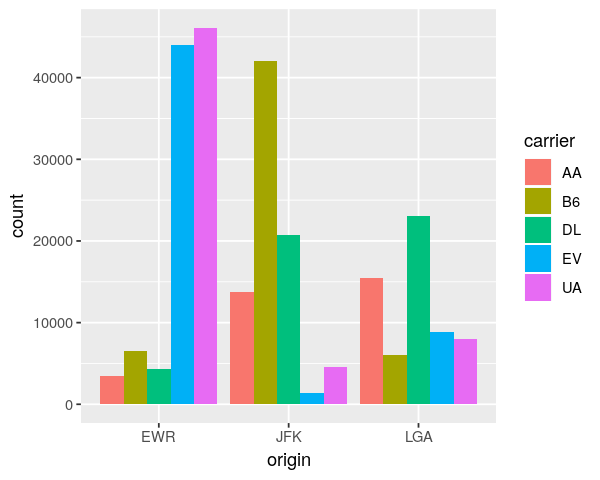

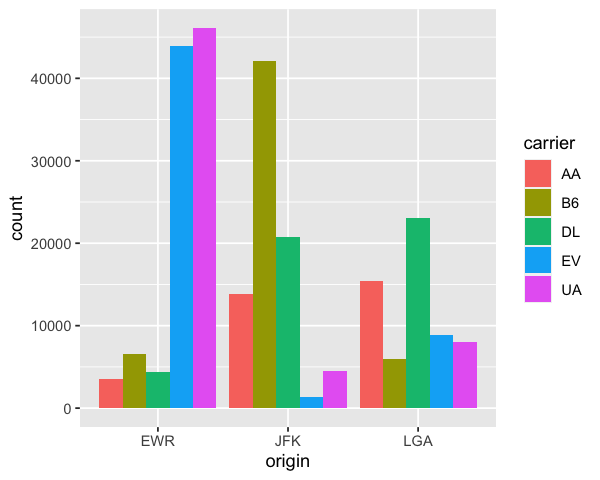

In [8]:
### BEGIN SOLUTION
flights %>% filter(carrier %in% flights_top5$carrier) %>% 
            ggplot + geom_bar(aes(fill=carrier, x=origin), position="dodge")
### END SOLUTION

## Problem 4: Challenge Problem (2 pts)

Each problem set will feature one or two questions that go a bit beyond what we have covered in lab and lecture. The goal of these is for you learn how to use online resources (R's help, Google, Stack Overflow, etc.) to solve programming challenges that you have not encountered before. This is an important skill which you will use constantly as data scientists in the real world.

Load the `diamonds` data set.  Reproduce the following plot. 

(Hint: for this plot, you will need figure out how to manually manipulate the ticks on the $x$ and $y$ axes.)

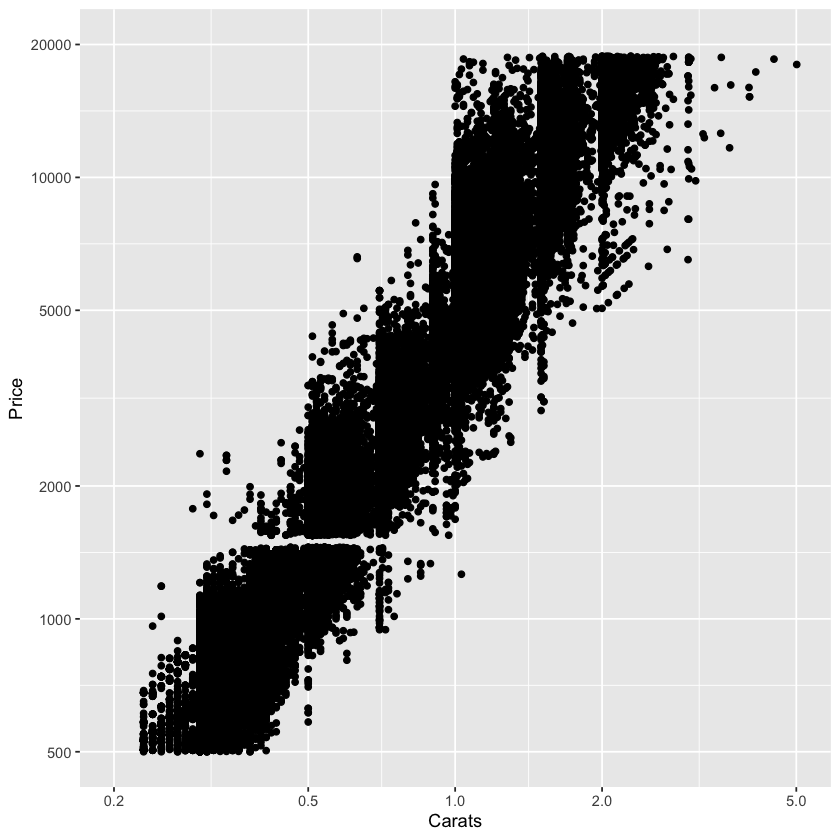

In [10]:
# Your solution here